# Bag of Words Linear Regression

In [4]:
import pandas
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import nltk

## Import Data

In [5]:
data = pandas.read_csv('dump.csv', delimiter=',', encoding='latin-1')

## Create Near Miss Columns

In [6]:
data['near_miss'] = data['event_type'].apply(lambda x: 1 if x=='Near miss' else 0)

## Tokenize and Clean
Tokenize each entry, lowercase all words, and remove punctuations.

In [7]:
tokenized_entries = [entry.split(' ') for entry in data['incident_description']]
punctuation = [",", ":", ";", ".", "'", '"', "’", "?", "/", "-", "+", "&", "(", ")"]

def clean(token):
    token = token.lower()
    for punc in punctuation:
        if punc in token:
            token = token.replace(punc, '')
    return token

cleaned_entries = [[clean(word) for word in entry] for entry in tokenized_entries]
cleaned_entries[:30]

[['bolus',
  'was',
  'not',
  'prescribed',
  'by',
  'md',
  'pt',
  'received',
  '2',
  'treatments',
  'wothout',
  'bolus'],
 ['noticed',
  'by',
  'nutistionist',
  'pt',
  'had',
  'app',
  'with',
  'support',
  'group',
  'that',
  'patient',
  'needed',
  'to',
  'be',
  'evaluated',
  'for',
  'skin',
  'reaction',
  'pt',
  'not',
  'assessed',
  'by',
  'rn',
  'on',
  'last',
  'day',
  'of',
  'treatment',
  'patient',
  'noticed',
  'after',
  'her',
  'treatments',
  'were',
  'completed',
  'that',
  'her',
  'skin',
  'broke',
  'down',
  'she',
  'tried',
  'to',
  'contact',
  'trwatment',
  'unit',
  'andor',
  'rad',
  'onc',
  'on',
  'call',
  'with',
  'no',
  'success',
  'pt',
  'even',
  'presented',
  'herself',
  'x1',
  'but',
  'left',
  'due',
  'to',
  'lenghty',
  'wait',
  'time'],
 ['ready',
  'for',
  'treatment',
  'task',
  'sentcompletedhowever',
  'call',
  'patient',
  'task',
  'never',
  'sent',
  'delay',
  '1',
  'day'],
 ['physics',
  '

## Unique Tokens
Create a list of unique tokens from all entries.

In [401]:
unique_words = list(set([word for entry in cleaned_entries for word in entry]))
unique_words[:30]

['',
 'asap',
 'lung',
 'shoulderposition',
 'zofran',
 'compatible',
 'developed',
 'catheters',
 'rescan',
 'single',
 'am',
 'pressing',
 'quality',
 '0644787',
 'able',
 'redo',
 'offset',
 'brachy',
 'booked',
 'lmandible',
 'jk',
 'rest',
 'decision',
 'basilic',
 'email',
 'staff',
 'patient',
 'qa',
 'preparation',
 'location']

## Empty Matrix
Create an empty matrix with the list of unique tokens as columns and entries as indices.

In [402]:
counts = pandas.DataFrame(0, index=numpy.arange(len(cleaned_entries)), columns=unique_words)
counts[:30]

,,asap,lung,shoulderposition,zofran,compatible,developed,catheters,rescan,single,...,further,subsequent,asked,two,many,09112017,margin,wb,stx_1,bolus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Complete Matrix
Complete the matrix with the number of times each word appears in each entry.

In [403]:
for i, entry in enumerate(cleaned_entries):
    for word in entry:
        if word in unique_words:
            counts.iloc[i][word] += 1
counts[:30]

,,asap,lung,shoulderposition,zofran,compatible,developed,catheters,rescan,single,...,further,subsequent,asked,two,many,09112017,margin,wb,stx_1,bolus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Prevent Overfitting
Prevent overfitting by taking into account only words that appear more than 25 times throughout the dataset. The threshold 25 offers the highest AUC compared to other thresholds.

In [404]:
word_counts = counts.sum(axis=0)
counts = counts.loc[:,(word_counts >= 25)]
counts[:30]

,,booked,patient,plan,scan,however,on,start,had,noticed,...,there,this,ctsim,was,sim,and,vacloc,called,in,bolus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
1,0,0,2,0,0,0,2,0,1,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,3,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Linear Regression Modelling

In [447]:
features_train, features_test, y_train, y_test = train_test_split(counts, data['near_miss'], test_size=0.15, random_state=1)

clf = LinearRegression()
clf.fit(features_train, y_train)

predictions = clf.predict(features_test)
predictions[:30]

array([-0.04589752,  0.44277263,  0.15966118,  0.05988527,  0.11012519,
       -0.23426115,  0.96231225,  0.24408658,  0.34285567,  0.00171476,
        0.18013215,  0.04385375, -0.2101982 ,  0.07466608,  0.12920373,
        0.357197  ,  0.12278362,  0.8211079 ,  0.12803493,  0.26196779,
        0.02438519,  0.64005873,  1.01272258,  0.23477288,  0.23154209,
        0.1025938 , -0.03580348,  0.13416464,  0.08748439,  0.20574768])

## Area Under the Receiver Operator Curve (ROC) Calculation

In [448]:
roc_auc = roc_auc_score(y_test, predictions)
roc_auc

0.8180803571428571

## Graph ROC

In [449]:
fpr, tpr, threshold = roc_curve(y_test, predictions)

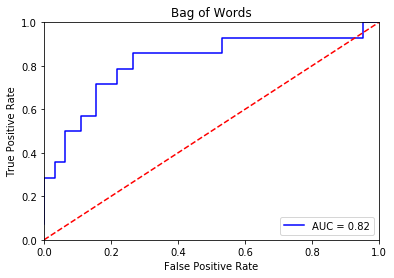

In [450]:
plt.title('Bag of Words')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Other Linear Regression Models
Three other linear regression models based on counts by tag.

In [431]:
tags = ['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']
noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']
verb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

In [410]:
def wc(st):
    return len(st.split(' '))
wc ('During chart QA, it was noticed that a 0.3cm')

9

In [411]:
def tag(st):
    return nltk.pos_tag(st.split())
tag('Missing info. on sim/ct sim sheet')

[('Missing', 'VBG'),
 ('info.', 'NN'),
 ('on', 'IN'),
 ('sim/ct', 'JJ'),
 ('sim', 'JJ'),
 ('sheet', 'NN')]

In [412]:
def this_tag(st, tl):
    return [w for (w, t) in tag(st) if t in tl]
this_tag('Missing info. on sim/ct sim sheet', ['NN'])

['info.', 'sheet']

In [413]:
def analyze(df, cls):
    for cl in cls:
        df[cl+'_wc'] = df[cl].apply(wc)
        df[cl+'_N'] = df[cl].apply(lambda x: len(this_tag(x, noun_tags)))
        df[cl+'_V'] = df[cl].apply(lambda x: len(this_tag(x, verb_tags)))
        for tag in tags:
            df[cl+'_'+tag] = df[cl].apply(lambda st: len(this_tag(st, [tag])))
    return df

In [ ]:
analyzed = analyze(data, ['incident_description'])

In [415]:
analyzed['near_miss'] = analyzed['event_type'].apply(lambda x: 1 if x=='Near miss' else 0)

In [416]:
analyzed.corr()['near_miss']

ermi                           0.031837
patient_year_birth             0.045457
total_dose_prescribed         -0.047696
number_fractions_prescribed   -0.047033
number_fractions_incorrect          NaN
near_miss                      1.000000
incident_description_wc        0.164199
incident_description_N         0.126654
incident_description_V         0.114583
incident_description_CC        0.106061
incident_description_CD        0.015178
incident_description_DT        0.161103
incident_description_EX        0.122768
incident_description_FW       -0.029476
incident_description_IN        0.123657
incident_description_JJ        0.176470
incident_description_JJR      -0.023707
incident_description_JJS      -0.039680
incident_description_LS             NaN
incident_description_MD        0.023628
incident_description_NN        0.189157
incident_description_NNS       0.018969
incident_description_NNP       0.044286
incident_description_NNPS     -0.037941
incident_description_PDT      -0.043853


In [451]:
highest = ['incident_description_wc', 'incident_description_JJ', 'incident_description_NN']

In [452]:
features_train, features_test, y_train, y_test = train_test_split(data[features], data['near_miss'], test_size=0.15, random_state=1)

clf = LinearRegression()
clf.fit(features_train, y_train)

predictions = clf.predict(features_test)
predictions[:30]

array([ 0.57582446,  0.22172683,  0.12248361,  0.14946333,  0.19923351,
        0.07066933,  0.34540212, -0.11094174,  0.10024805,  0.18203001,
        0.19887   ,  0.3445699 ,  0.04598357,  0.0509918 ,  0.23011226,
        0.23371673,  0.15572621,  0.22873736,  0.04951928,  0.1459995 ,
        0.17777284,  0.37061609,  0.20991914,  0.23911374,  0.79303709,
        0.25464224, -0.34551462, -0.16082238,  0.11991736,  0.40846552])

In [453]:
roc_auc = roc_auc_score(y_test, predictions)
roc_auc

0.69754464285714279

In [454]:
fpr, tpr, threshold = roc_curve(y_test, predictions)

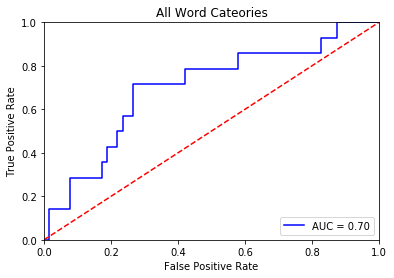

In [455]:
plt.title('All Word Cateories')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [422]:
features_train, features_test, y_train, y_test = train_test_split(data[['incident_description_NN']], data['near_miss'], test_size=0.15, random_state=1)

clf = LinearRegression()
clf.fit(features_train, y_train)

predictions = clf.predict(features_test)
predictions[:30]

array([ 0.12283073,  0.18901914,  0.18901914,  0.13937783,  0.17247203,
        0.13937783,  0.20556624,  0.12283073,  0.20556624,  0.18901914,
        0.15592493,  0.22211334,  0.17247203,  0.18901914,  0.12283073,
        0.13937783,  0.17247203,  0.22211334,  0.17247203,  0.12283073,
        0.18901914,  0.17247203,  0.12283073,  0.18901914,  0.42067854,
        0.20556624,  0.37103724,  0.22211334,  0.13937783,  0.12283073])

In [423]:
roc_auc = roc_auc_score(y_test, predictions)
roc_auc

0.6746651785714286

In [424]:
fpr, tpr, threshold = roc_curve(y_test, predictions)

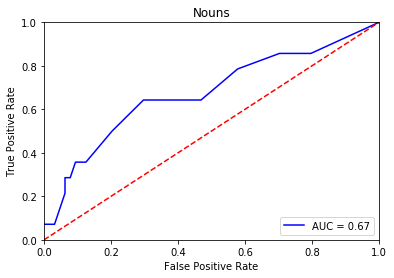

In [425]:
plt.title('Nouns')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [426]:
features_train, features_test, y_train, y_test = train_test_split(data[highest], data['near_miss'], test_size=0.15, random_state=1)

clf = LinearRegression()
clf.fit(features_train, y_train)

predictions = clf.predict(features_test)
predictions[:30]

array([ 0.18198114,  0.18101442,  0.17692646,  0.12596566,  0.15837596,
        0.13550424,  0.20297155,  0.12202439,  0.20637818,  0.16231723,
        0.16866396,  0.21985802,  0.15088137,  0.16981182,  0.12611235,
        0.19121584,  0.16208396,  0.24536848,  0.17639182,  0.11998041,
        0.1589106 ,  0.15224402,  0.12747501,  0.18812905,  0.47404078,
        0.2043342 ,  0.38334027,  0.18995824,  0.13346026,  0.13905756])

In [427]:
roc_auc = roc_auc_score(y_test, predictions)
roc_auc

0.7042410714285714

In [428]:
fpr, tpr, threshold = roc_curve(y_test, predictions)

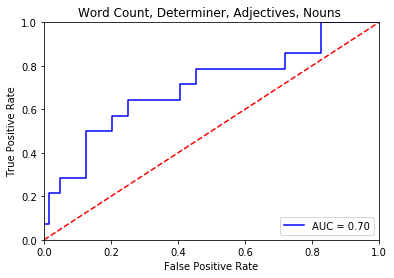

In [429]:
plt.title('Word Count, Determiner, Adjectives, Nouns ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()